In [41]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
ticker = '^GSPC'
start_date = '1985-01-01'
end_date = '2024-09-01'
monthly_data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [47]:
# Calculate the monthly returns based on the resampled monthly data
monthly_returns = monthly_data['Adj Close'].pct_change()

# Add a 'Month' column for easier analysis
monthly_returns_df = monthly_returns.to_frame(name='Monthly Return')
monthly_returns_df['Month'] = monthly_returns_df.index.month
average_monthly_returns = monthly_returns_df.groupby('Month')['Monthly Return'].mean()

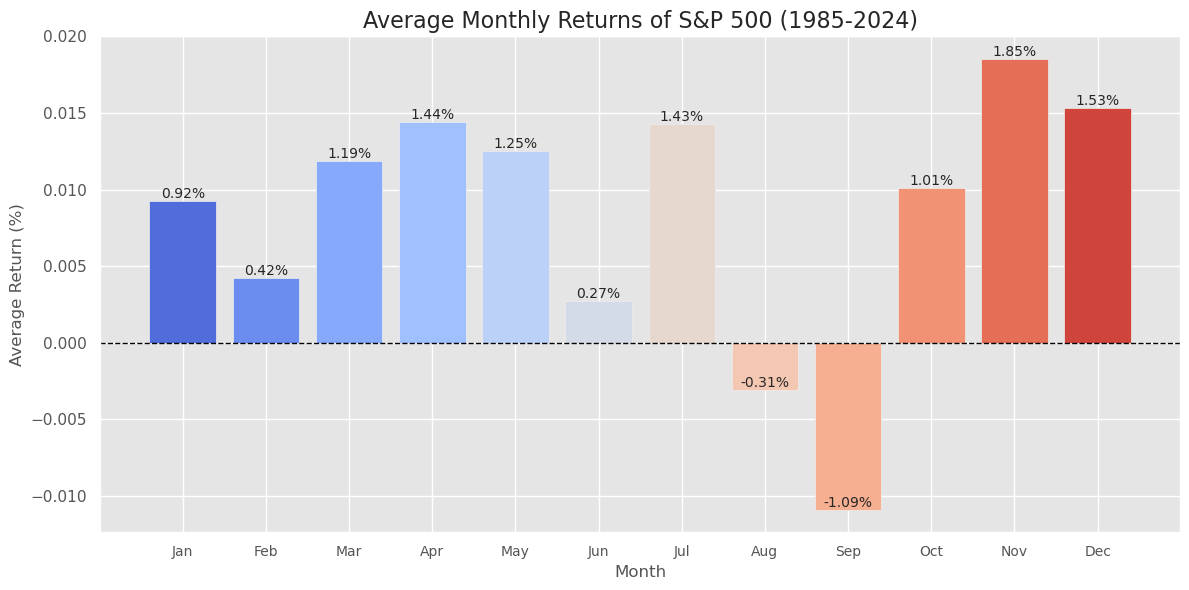

In [48]:
# Setting a style
plt.style.use('ggplot')

# Define a color palette for the bars (optional)
colors = sns.color_palette('coolwarm', 12)

# Create the bar plot with enhanced aesthetics
plt.figure(figsize=(12, 6))
bars = plt.bar(average_monthly_returns.index, average_monthly_returns.values, color=colors)

# Add labels, title, and customize tick marks
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Return (%)', fontsize=12)
plt.title('Average Monthly Returns of S&P 500 (1985-2024)', fontsize=16)

# Customize x-ticks to show month abbreviations
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)

# Horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', lw=1)

# Annotate the bars with exact values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
september_returns = monthly_returns_df[monthly_returns_df['Month'] == 9]['Monthly Return']

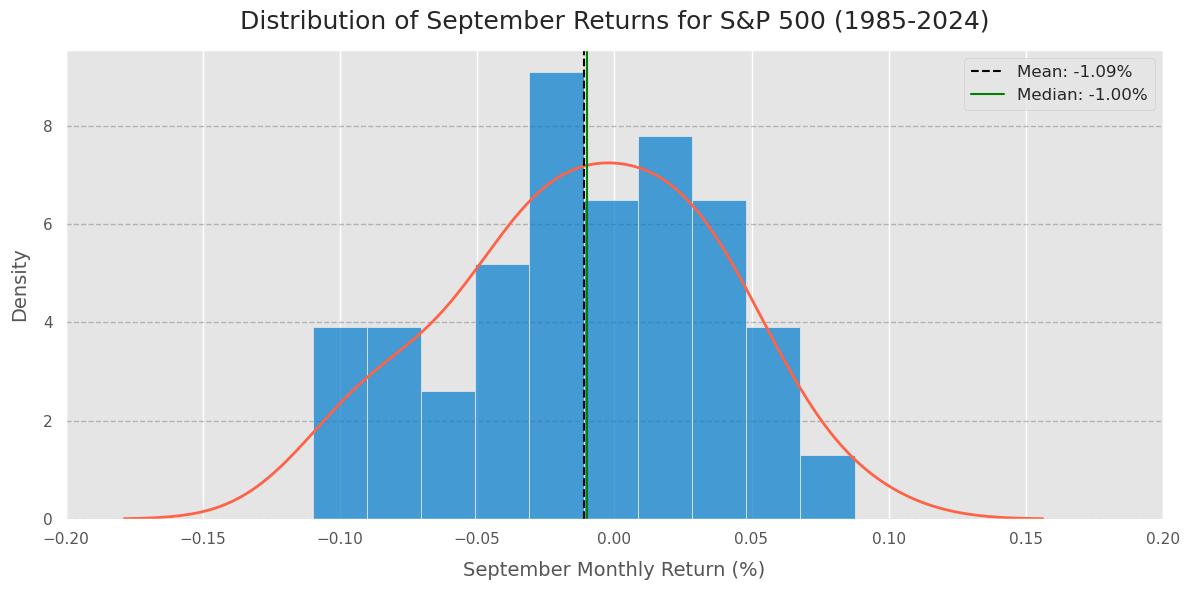

In [55]:
# Enhanced plot with both mean and median lines
plt.figure(figsize=(12, 6))

# Plot the histogram and KDE
sns.histplot(september_returns, bins=10, color='#007acc', alpha=0.7, stat='density')
sns.kdeplot(september_returns, color='#ff6347', linewidth=2)

# Customize the x and y-axis labels and title
plt.xlabel('September Monthly Return (%)', fontsize=14, labelpad=10)
plt.ylabel('Density', fontsize=14, labelpad=10)
plt.title('Distribution of September Returns for S&P 500 (1985-2024)', fontsize=18, pad=15)
plt.xlim([-0.2, 0.2])

# Calculate the mean and median
mean_value = september_returns.mean()
median_value = september_returns.median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='black', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2%}')
plt.axvline(median_value, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_value:.2%}')

# Add legend to display the mean and median
plt.legend(fontsize=12)

# Add gridlines with transparency
plt.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.5)

# Use tight layout for better space usage
plt.tight_layout()

# Show the plot
plt.show()
